# 1. Data Reading & Parsing
- Import libraries
- Read in data and parse dates as index
<br>Purpose: get the data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('Data7000.csv', parse_dates=["Timestamp"], index_col="Timestamp",date_parser=lambda x: pd.to_datetime(x))

# 2. Data Integrity Checks
- Check for null values
- Check for duplicate rows
- Check for sampling interval consistency
<br>Purpose: ensure data is complete and unique

In [114]:
# Check number of entries, number of null entries, and feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7079 entries, 2025-05-23 17:34:19 to 2025-05-28 15:54:21
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature (°C)     7079 non-null   float64
 1   Humidity (%)         7079 non-null   float64
 2   Pressure (hPa)       7079 non-null   float64
 3   Gas Resistance (Ω)   7079 non-null   float64
 4   Violet (450nm)       7079 non-null   float64
 5   Blue (500nm)         7079 non-null   float64
 6   Green (550nm)        7079 non-null   float64
 7   Yellow (570nm)       7079 non-null   float64
 8   Orange (600nm)       7079 non-null   float64
 9   Red (650nm)          7079 non-null   float64
 10  Ambient Light (lux)  7079 non-null   float64
dtypes: float64(11)
memory usage: 663.7 KB


In [115]:
# Check for duplicate rows
dup = df.index.duplicated(keep='first')
print(f"Number of rows with duplicate timestamps: {dup.sum()}")

Number of rows with duplicate timestamps: 0


We can see that there are no null or duplicated readings.

In [116]:
# Check for anomalies in the sampling rate of the data
df.index.to_series().diff().describe()

count                         7078
mean     0 days 00:01:00.186775925
std      0 days 00:00:00.389759081
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max                0 days 00:01:01
Name: Timestamp, dtype: object

In [117]:
# Number of readings per interval
df.index.to_series().diff().value_counts().sort_index()

Timestamp
0 days 00:01:00    5756
0 days 00:01:01    1322
Name: count, dtype: int64

Expected readings for our data collection intervals: 7100
<br>
Actual readings: 7079
<br>
Because there is a difference of only 21 readings, we will not correct the sampling interval irregularity in the data.

# 3. Summary Statistics & Univariate Analysis
- Find count, mean, standard deviation, min/max, percentiles for each sensor channel
- Plot histograms for each sensor channel
<br> Purpose: use marginal distributions to understand how variables behave

In [118]:
df.describe()

,Temperature (°C),Humidity (%),Pressure (hPa),Gas Resistance (Ω),Violet (450nm),Blue (500nm),Green (550nm),Yellow (570nm),Orange (600nm),Red (650nm),Ambient Light (lux)
count,7079.000000,7079.000000,7079.000000,7079.0,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000
mean,29.955293,21.899209,1017.922495,102400000.0,23.727498,25.868693,38.973681,38.271835,41.168212,23.469943,88.296696
std,1.491915,1.925520,5.141008,0.0,37.729854,37.916762,61.517743,62.193459,68.449308,37.096684,128.883503
min,25.730000,13.610000,1006.830000,102400000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000
25%,29.040000,20.580000,1014.570000,102400000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000
50%,29.900000,21.500000,1018.650000,102400000.0,5.870000,6.420000,6.820000,6.690000,5.990000,4.500000,22.580000
75%,30.850000,22.840000,1022.960000,102400000.0,18.770000,29.510000,35.240000,31.520000,29.940000,21.610000,95.160000
max,38.450000,29.910000,1025.030000,102400000.0,161.900000,204.020000,277.360000,260.780000,269.470000,162.990000,413.950000


In [119]:
df.head()

,Temperature (°C),Humidity (%),Pressure (hPa),Gas Resistance (Ω),Violet (450nm),Blue (500nm),Green (550nm),Yellow (570nm),Orange (600nm),Red (650nm),Ambient Light (lux)
Timestamp,,,,,,,,,,,
2025-05-23 17:34:19,30.42,22.54,1007.17,102400000.0,127.87,121.90,196.65,207.29,0.0,0.00,326.86
2025-05-23 17:35:20,30.38,22.80,1007.15,102400000.0,104.41,92.39,184.15,171.94,202.6,85.55,360.19
2025-05-23 17:36:20,30.38,22.64,1007.15,102400000.0,104.41,92.39,184.15,172.90,202.6,86.45,365.57
2025-05-23 17:37:20,30.08,23.70,1007.10,102400000.0,103.24,91.10,183.01,171.94,201.6,84.65,361.27
2025-05-23 17:38:20,29.70,24.16,1007.13,102400000.0,103.24,91.10,185.28,172.90,204.6,85.55,362.34


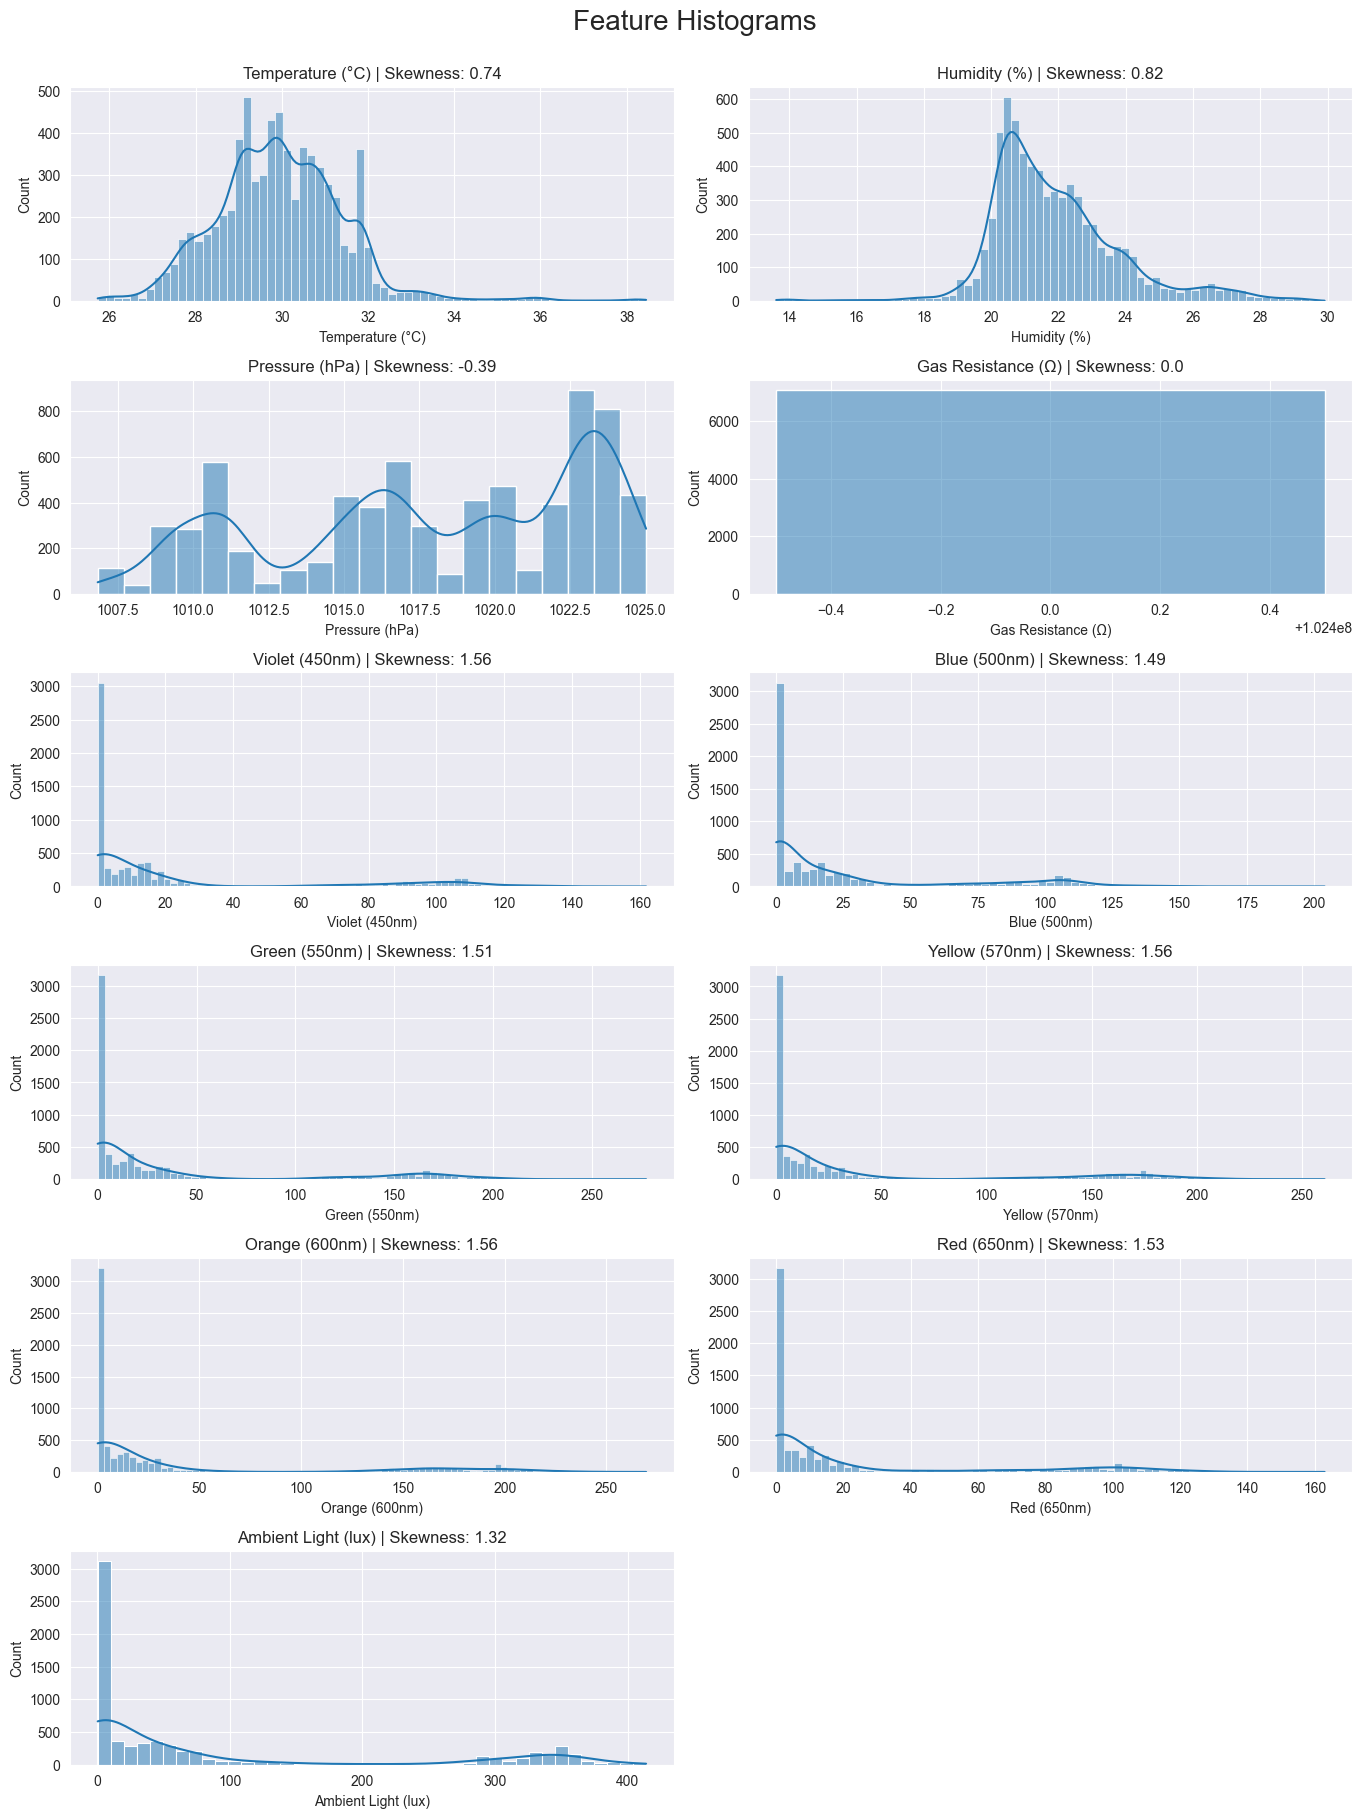

In [120]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.suptitle("Feature Histograms", fontsize = 20)
plt.tight_layout(rect=(0,0,0.98,0.98))
plt.show()

### Analysis:
If skew is above +/- 1 we consider the distribution right/left skewed. 
**Temperature:** 
 - mostly normal distribution, weak right skew
 - the majority of temperatures fall between 26 and 34 degrees.
 - there are peaks at about 29 degrees, 30 degrees, and 32 degrees
<br>**Humidity:** 
 - Almost normal distribution. weak right skew.
 - Majority of humidity readings lie between 20-26%
 - Peak at ~20%
<br>**Pressure:**
 - Multimodal. Peaks at about 1010.1, 1016, 1020, 1022.5 hPa. Largest peak at 1022.5 hPa
 - No skew
<br>**Gas Resistance:**
 - Square graph. This means that all of the gas resistance readings are so close together that all of the readings are essentially the same.
 - No skew
<br>**Light:**
 - The distributions for the different color bands all follow the same distribution.
 - The ambient light distribution also follows the same.
 - Both sensor streams have peaks at 0 which are a significant deviation over the other readings.
 - All have moderate right skews

# 3. Bivariate analysis
- Pairwise scatter plots to see key pair trends trends
- Correlation matrix
Purpose: find visual patterns and linear association.

'plt.figure(figsize=(14,4))\nfor i in range(4,len(df.columns)):\n    if i == 10: break\n    sns.scatterplot(df, x="Ambient Light (lux)", y=df.columns[i])\nplt.legend()\nplt.title("Ambient Light (lux) vs Color Channels")'

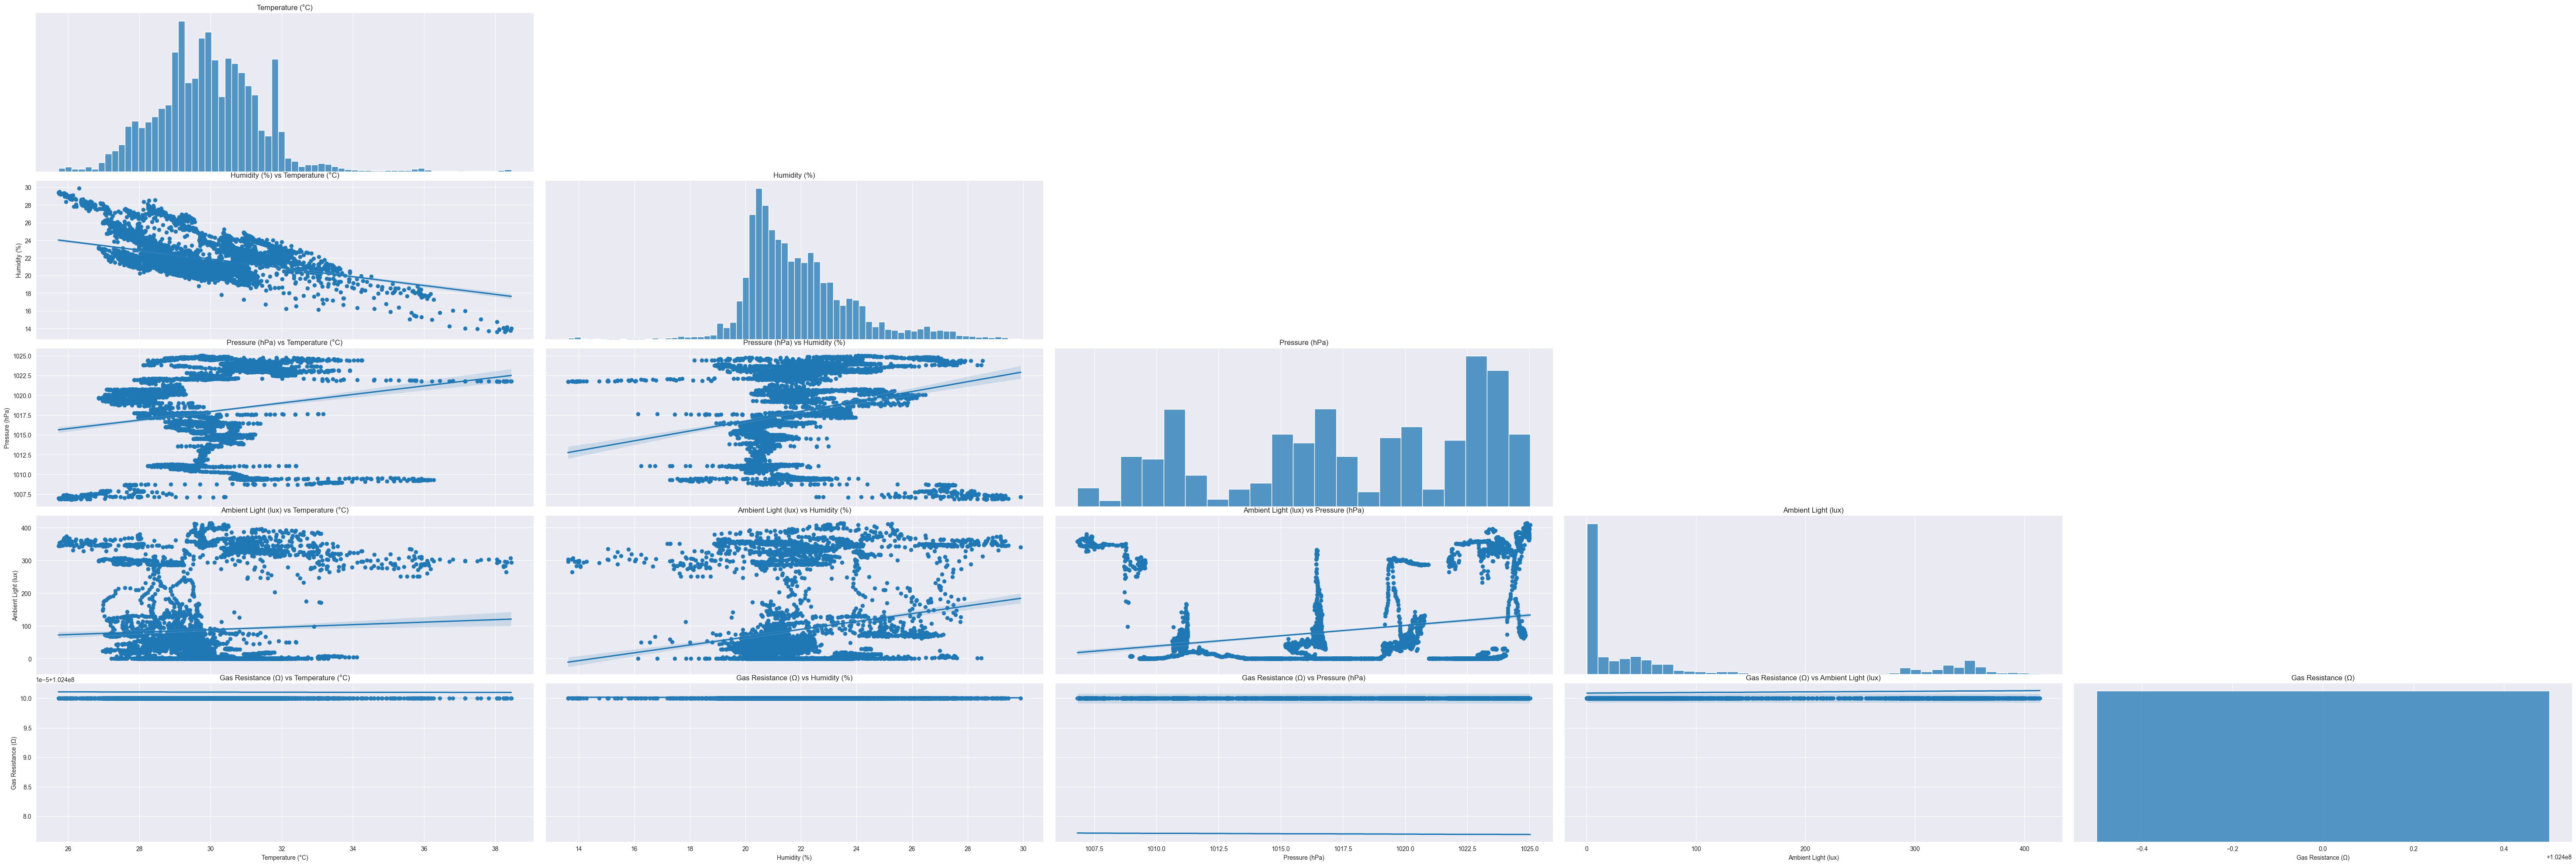

In [ ]:
gvars = ["Temperature (°C)", "Humidity (%)", "Pressure (hPa)", "Ambient Light (lux)", "Gas Resistance (Ω)"]
g = sns.PairGrid(df, vars=gvars, height=4,aspect=3, diag_sharey=False, corner=True)
g = g.map_lower(sns.scatterplot)
g = g.map_lower(sns.regplot)
g = g.map_diag(sns.histplot)

for i, row_var in enumerate(gvars):
    for j, col_var in enumerate(gvars):
        if j>=(i+1): continue
        ax = g.axes[i,j]
        if i!=j:
            ax.set_title(f"{row_var} vs {col_var}")
        else:
            ax.set_title(f"{row_var}")


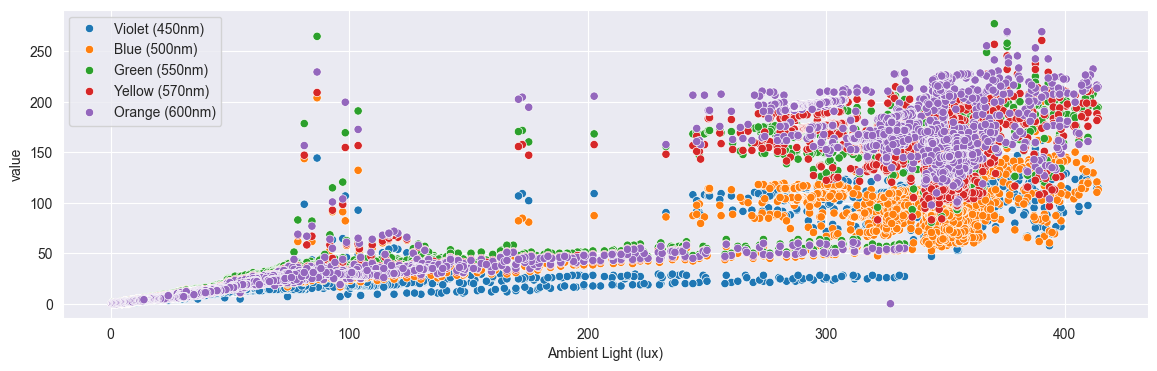

In [167]:
df_colors = pd.melt(df, id_vars="Ambient Light (lux)", value_vars = df.iloc[:,4:9])
plt.figure(figsize=(14,4))
sns.scatterplot(df_colors, x="Ambient Light (lux)", y="value",hue="variable")
plt.legend()

### Analysis
**Temperature vs Humidity:**
- Strong inverse linear relationship between temperature and humidity. This is an expected relationship
**

# 4. Multivariate Analysis
- Correlation Heatmap

<Axes: >

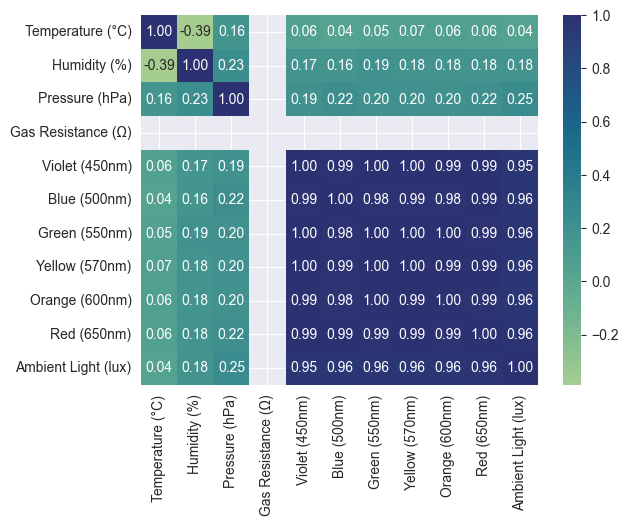

In [174]:
sns.heatmap( df.corr(), annot=True, fmt='.2f', cmap="crest",)

# 5. Time Series Analysis
- Resample data to hourly data
- Plot time series lineplots

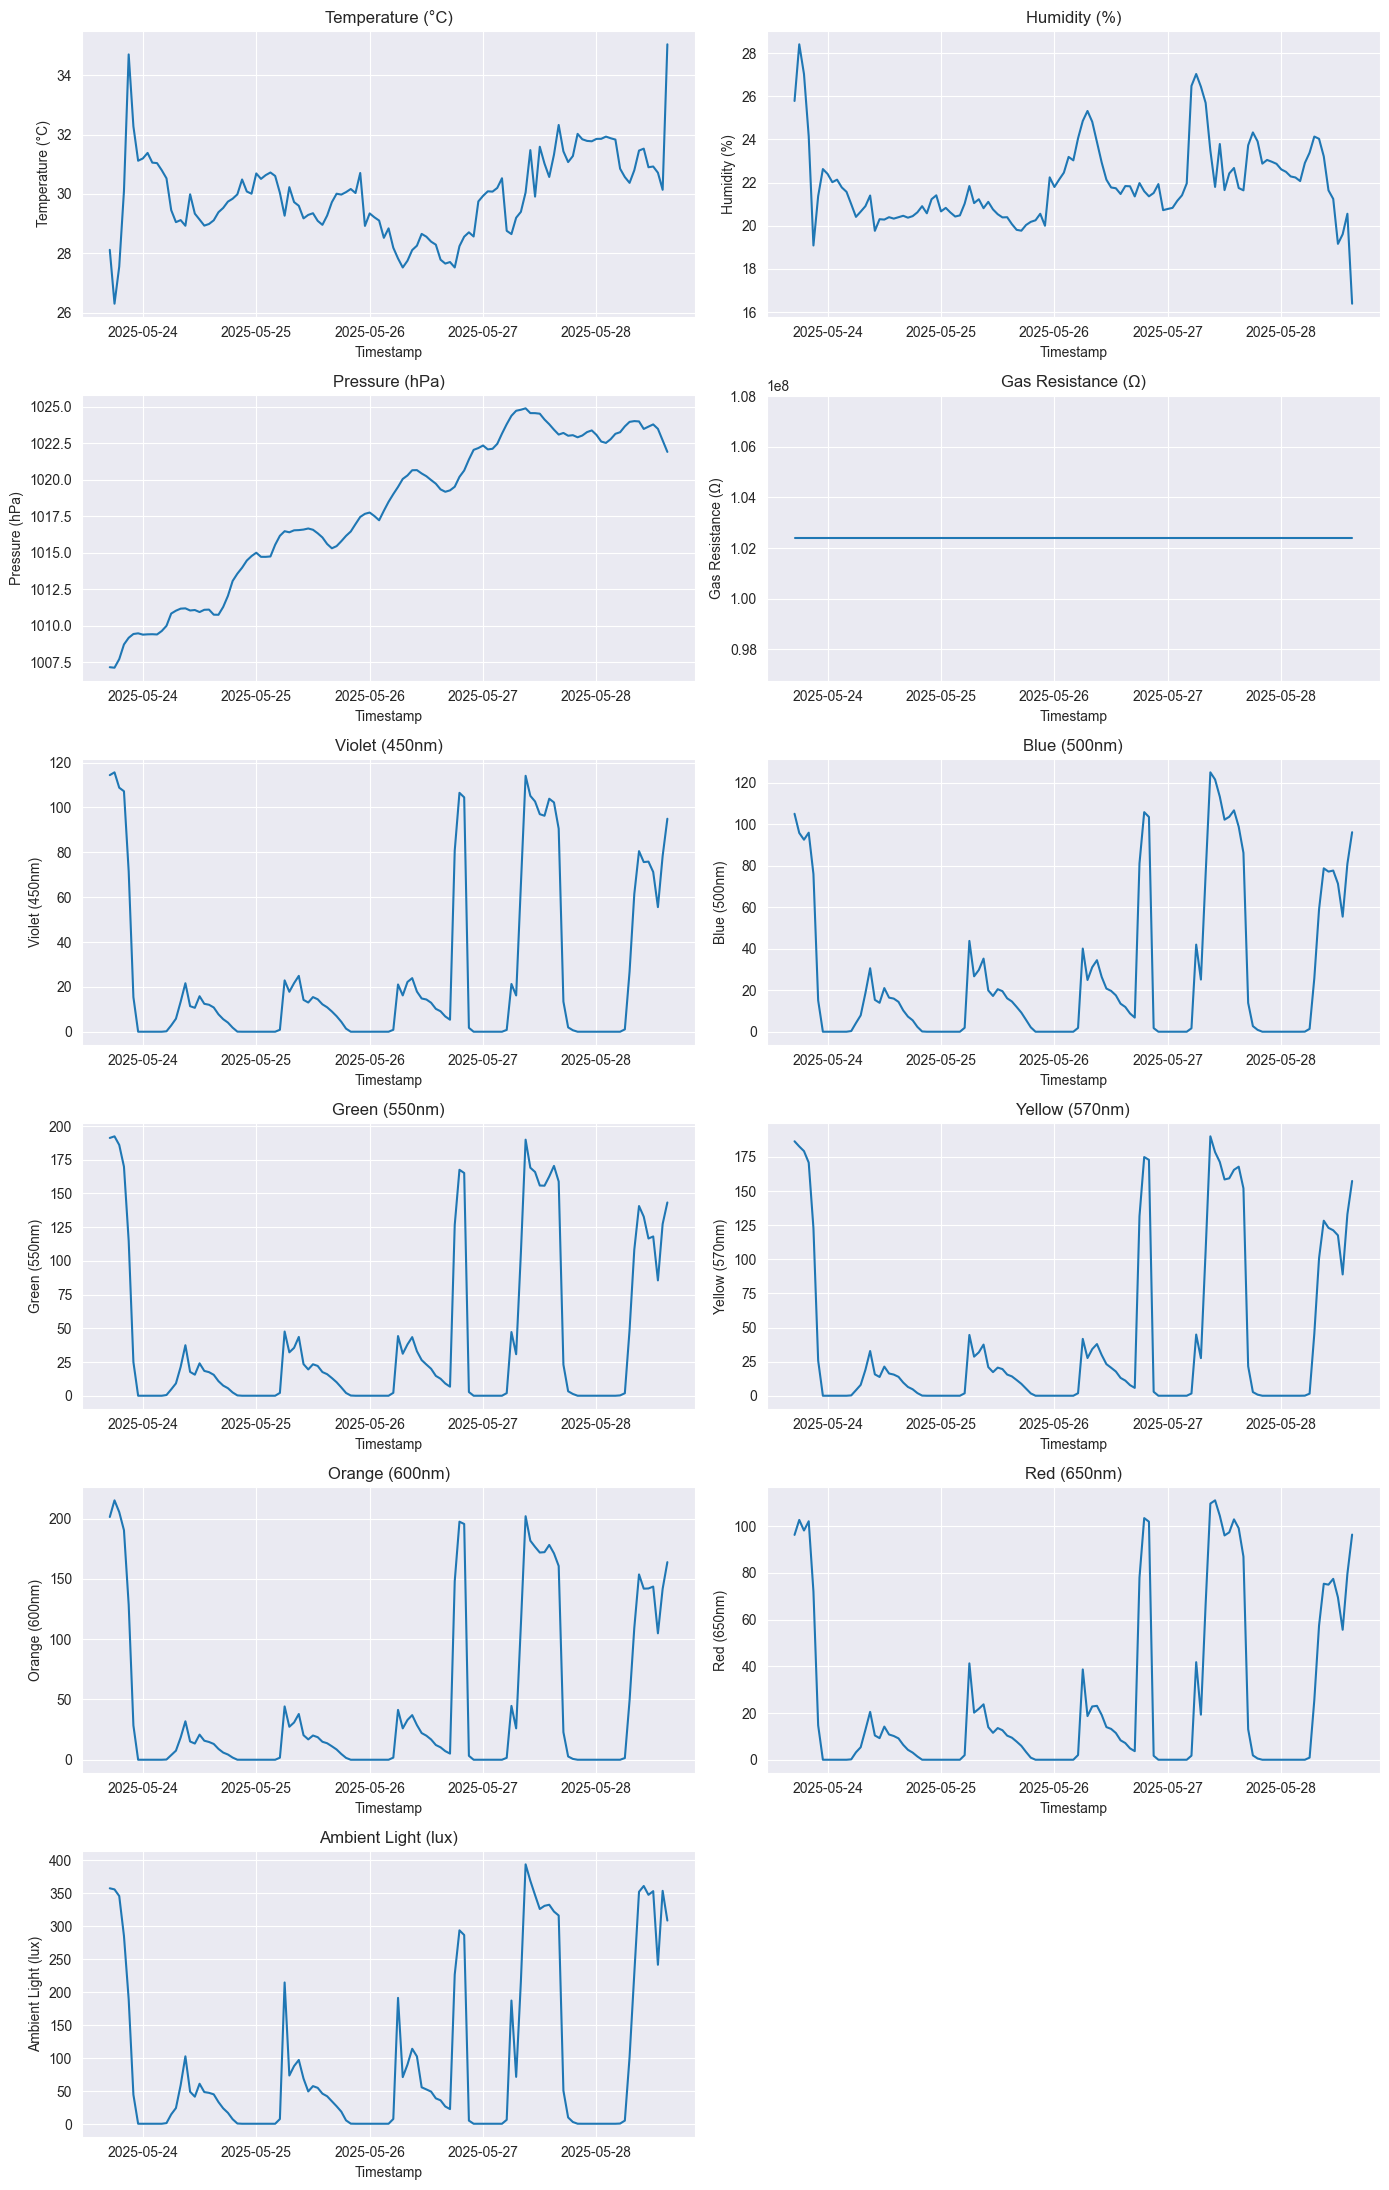

In [211]:
df_hr = df.resample('H').mean() #resample data to hourly

#df_d = df.resample('D').mean()

plt.figure(figsize=(14, len(df.columns)*2))
for i, var in enumerate(df_hr, 1):
    plt.subplot(6, 2, i)
    sns.lineplot(df_hr[var])
    plt.title(f"{var}")
plt.tight_layout()

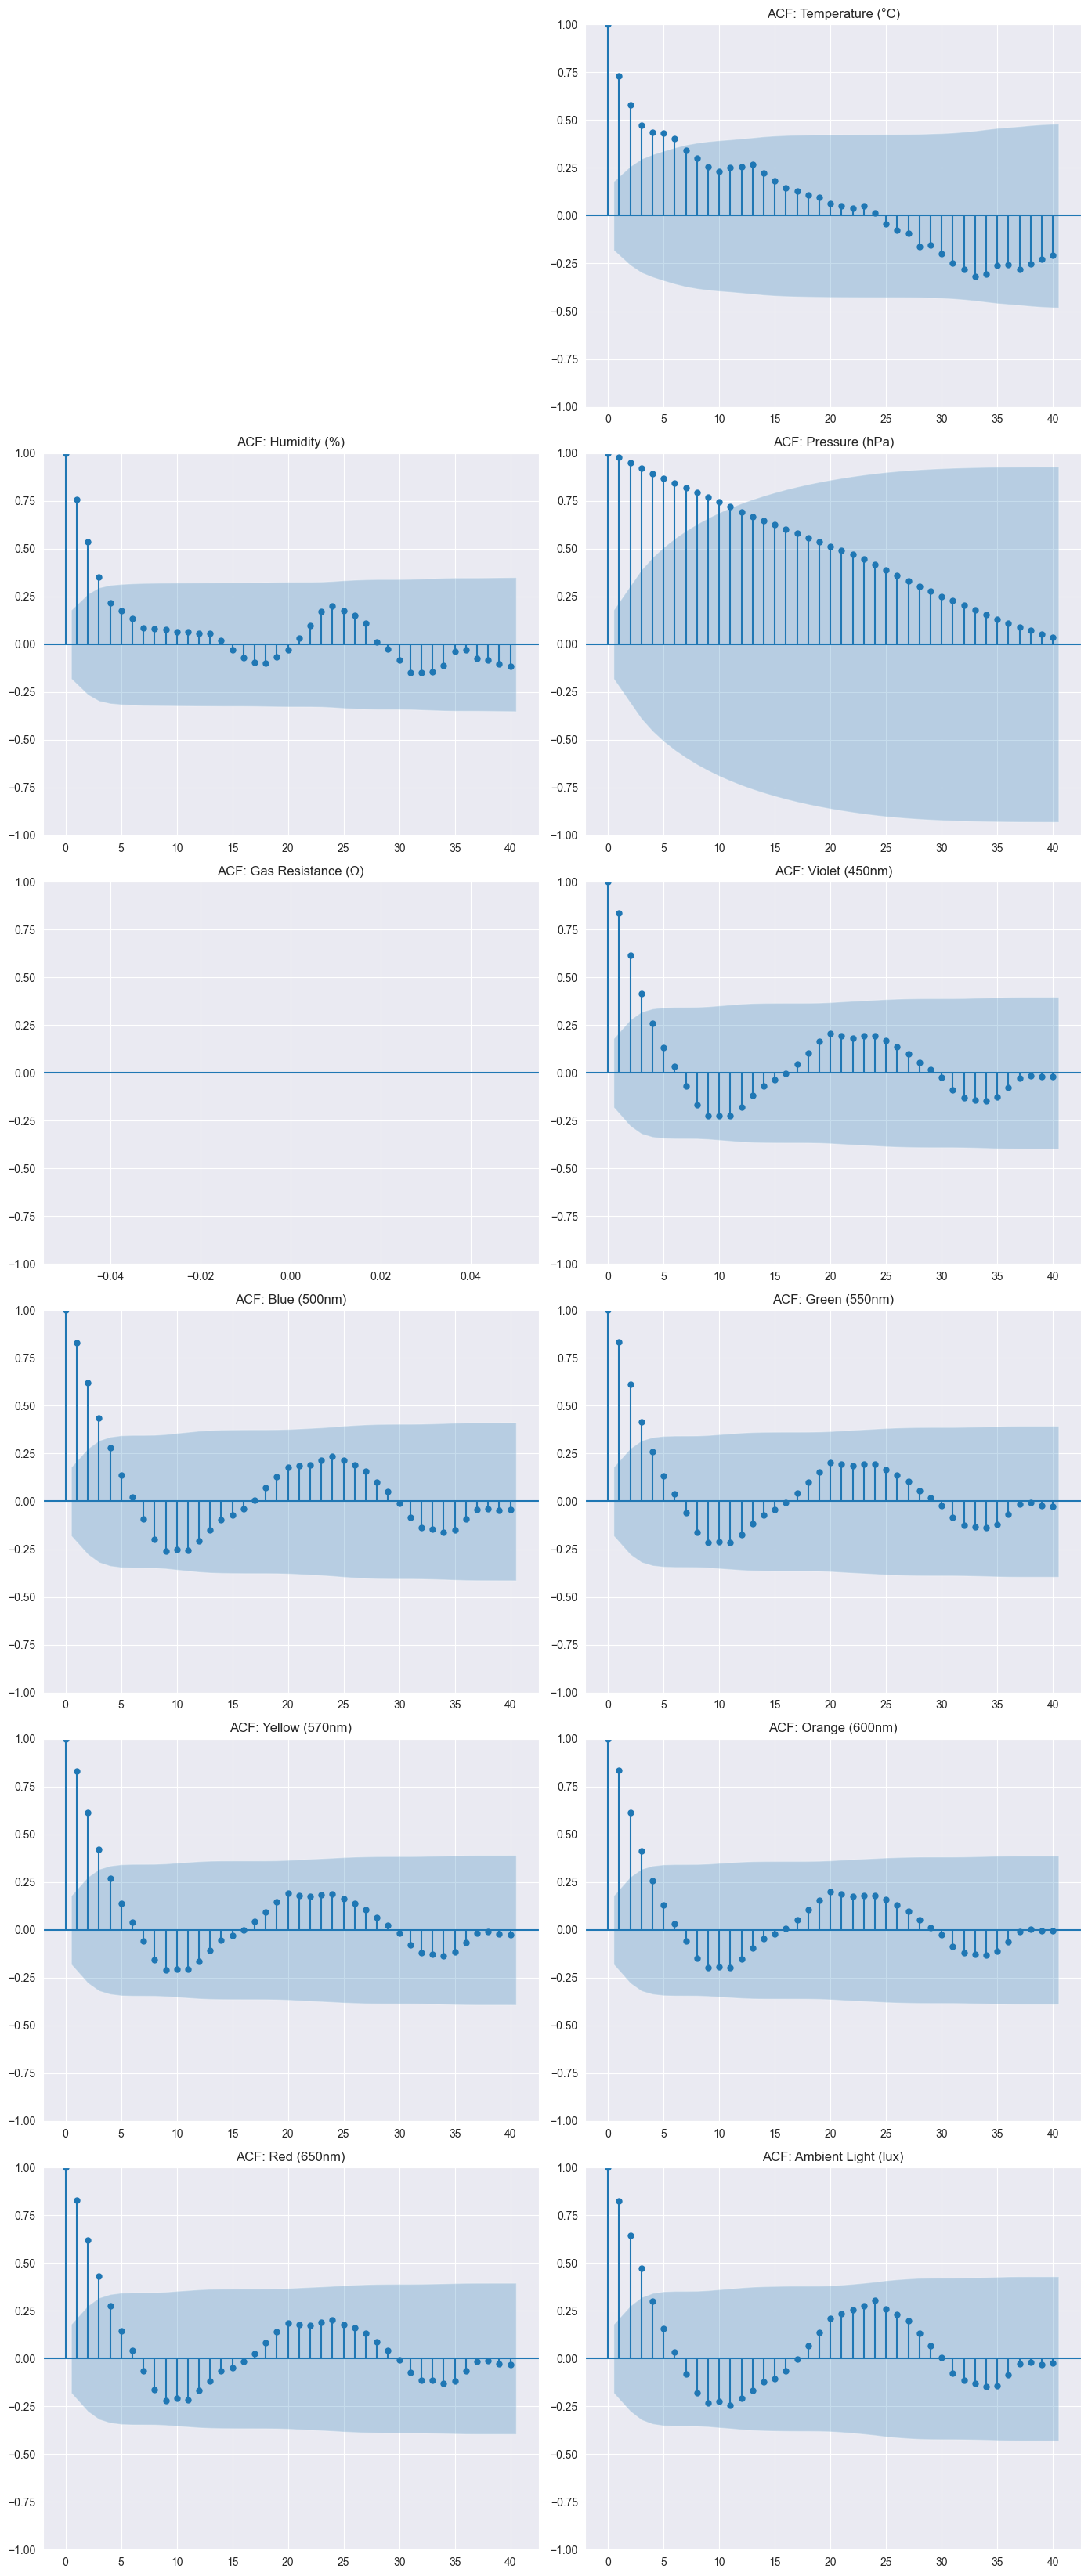

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(6, 2, figsize=(14, len(df.columns)*3))
ax=ax.flatten()
for i, var in enumerate(df_hr, 1):
    #plt.subplot(6, 2, i)
    plot_acf(df_hr[var], ax=ax[i], lags=40)
    ax[i].set_title(f"ACF: {var}")
ax[0].axis('off')
plt.tight_layout()


In [224]:
from statsmodels.tsa.stattools import adfuller

for i, var in enumerate(df_hr, 1):
    if var == "Gas Resistance (Ω)": 
        print(f"{var}\nNo result because it is constant\n")
        continue
    r = adfuller(df_hr[var])
    print(f'{var}\nADF statistic: {r[0]}\np-val: {r[1]}\nCritical Values: {r[4]}\n')


Temperature (°C)
ADF statistic: -3.163418391540156
p-val: 0.02220223889640013
Critical Values: {'1%': np.float64(-3.487517288664615), '5%': np.float64(-2.8865777180380032), '10%': np.float64(-2.5801239192052012)}

Humidity (%)
ADF statistic: -3.1484975976116063
p-val: 0.023166185511943813
Critical Values: {'1%': np.float64(-3.4870216863700767), '5%': np.float64(-2.8863625166643136), '10%': np.float64(-2.580009026141913)}

Pressure (hPa)
ADF statistic: -1.6779957036548419
p-val: 0.4424839173769773
Critical Values: {'1%': np.float64(-3.4885349695076844), '5%': np.float64(-2.887019521656941), '10%': np.float64(-2.5803597920604915)}

Gas Resistance (Ω)
No result because it is constant

Violet (450nm)
ADF statistic: -4.140610337616419
p-val: 0.0008291892812532338
Critical Values: {'1%': np.float64(-3.487517288664615), '5%': np.float64(-2.8865777180380032), '10%': np.float64(-2.5801239192052012)}

Blue (500nm)
ADF statistic: -3.7077542477183347
p-val: 0.004005396360023345
Critical Values: {'